In [1]:
import os
import sys
ROOT_DIR = os.environ['ROOT_DIR']
sys.path.append(ROOT_DIR)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## compile data 

In [2]:
columns=['model_name', 'exp_id', 'ckpt_id', 'episode_id', 'agent_0_score', 'agent_1_score', 'max_agent_score']
df = pd.DataFrame([], columns=columns)

model_path = os.path.join(ROOT_DIR, 'data', 'MADDPG')
for exp_id in os.listdir(model_path):
    eval_path = os.path.join(model_path, exp_id, 'evaluation')
    if not os.path.isdir(eval_path):
        continue
    for eval_fname in os.listdir(eval_path):
        handle = os.path.join(eval_path, eval_fname)
        arr = np.load(handle)
        tmp_df = pd.DataFrame([], columns=columns)
        tmp_df['episode_id'] = range(0, arr.shape[0])
        tmp_df['ckpt_id'] = float(eval_fname.split('_')[0])
        tmp_df['model_name'] = 'MADDPG'
        tmp_df['exp_id'] = exp_id
        tmp_df['agent_0_score'] = arr[:, 0]
        tmp_df['agent_1_score'] = arr[:, 1]
        tmp_df['max_agent_score'] = np.max(arr, axis=1)
        df = df.append(tmp_df)
df.shape

(20200, 7)

## Make Plot

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


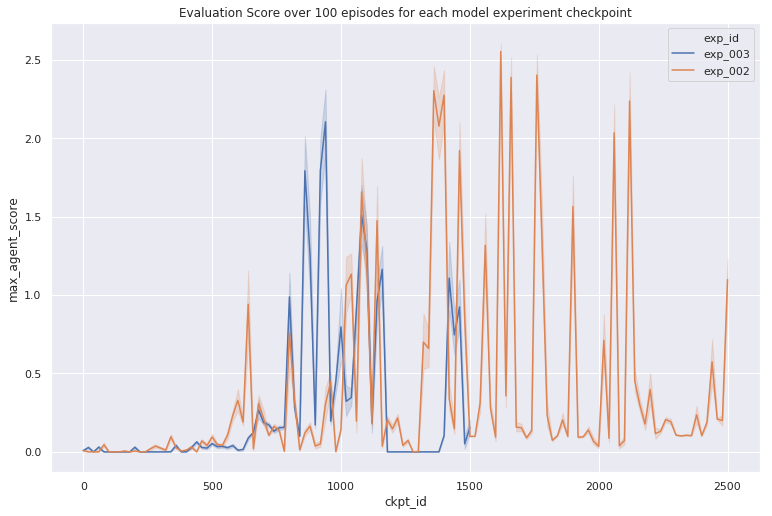

In [3]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.lineplot(x="ckpt_id",
             y="max_agent_score",
             hue='exp_id',
             data=df)
plt.title('Evaluation Score over 100 episodes for each model experiment checkpoint')
plt.show()